# 4. Human myocardial infarction atlas
Kuppe, C., Ramirez Flores, R. O., Li, Z., Hayat, S., Levinson, R. T., Liao, X., ... & Kramann, R. (2022). Spatial multi-omic map of human myocardial infarction. Nature, 608(7924), 766-777.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scanpro functions
from scanpro import scanpro
from scanpro.utils import convert_counts_to_df

In [2]:
# Setup path to R
R_home = os.path.dirname(sys.executable)[:-4] + "/lib/R"
os.environ["R_HOME"] = R_home
%load_ext rpy2.ipython

In [3]:
# path where figures are going to be saved
FIG_PATH = 'plots'

------------------

## Read data

In [4]:
human_MI_counts = pd.read_csv("data/human_MI_counts.tsv", sep="\t")
human_MI = convert_counts_to_df(human_MI_counts, meta_cols=['Sample', 'Sex', 'Age', 'Patient_group', 'Zone'],
                                column_name="cell_type")

In [5]:
human_MI.head()

,Sample,Sex,Age,Patient_group,Zone,cell_type
cell_1,CK158,Female,44,Myogenic,Control,Adipocyte
cell_2,CK158,Female,44,Myogenic,Control,Adipocyte
cell_3,CK159,Female,63,Myogenic,Fibrotic,Adipocyte
cell_4,CK159,Female,63,Myogenic,Fibrotic,Adipocyte
cell_5,CK159,Female,63,Myogenic,Fibrotic,Adipocyte


In [6]:
n_cells = human_MI[human_MI['Zone'].isin(['Control', 'Ischaemic'])].shape[0]
n_cells

76141

In [7]:
cluster_count = human_MI[human_MI['Zone'].isin(['Control', 'Ischaemic'])].value_counts('cell_type').sort_index().to_dict()
cluster_count

{'Adipocyte': 78,
 'Cardiomyocyte': 23176,
 'Cycling cells': 2587,
 'Endothelial': 12644,
 'Fibroblast': 19795,
 'Lymphoid': 1822,
 'Mast': 278,
 'Myeloid': 9673,
 'Neuronal': 769,
 'Pericyte': 4383,
 'Vsmcs': 936}

-------------

## Compare Ischaemic zone vs Control

### With replicates

In [8]:
# transform=logit
res_snrna = scanpro(human_MI, samples_col='Sample',
                    clusters_col='cell_type', conds_col='Zone', 
                    conditions=['Control','Ischaemic'])

res_snrna.results.to_csv("results/humanMI_scanpro_rep_logit.tsv", sep="\t")

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


In [9]:
# transform=arcsin
res_snrna = scanpro(human_MI, samples_col='Sample',
                    clusters_col='cell_type', conds_col='Zone', 
                    conditions=['Control','Ischaemic'], transform="arcsin")
res_snrna.results.to_csv("results/humanMI_scanpro_rep_arcsin.tsv", sep="\t")

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


In [10]:
res_snrna.results

,baseline_props,mean_props_Control,mean_props_Ischaemic,prop_ratio,t_statistics,p_values,adjusted_p_values
clusters,,,,,,,
Adipocyte,0.002727,0.000355,0.002084,0.170583,-0.880071,0.392633,0.474737
Cardiomyocyte,0.336349,0.442471,0.152491,2.901614,3.187247,0.006089,0.033489
Cycling cells,0.015537,0.005429,0.063373,0.085660,-4.283988,0.000645,0.007099
Endothelial,0.170411,0.146923,0.207000,0.709772,-1.436211,0.171366,0.269290
Fibroblast,0.246664,0.225862,0.271549,0.831755,-0.808137,0.431579,0.474737
Lymphoid,0.026403,0.012775,0.043002,0.297090,-2.079905,0.055004,0.151261
Mast,0.003749,0.003495,0.003041,1.149458,0.720604,0.482177,0.482177
Myeloid,0.109919,0.074778,0.185137,0.403904,-2.659489,0.017790,0.065232
Neuronal,0.012701,0.013734,0.007297,1.882211,1.834276,0.086423,0.190132


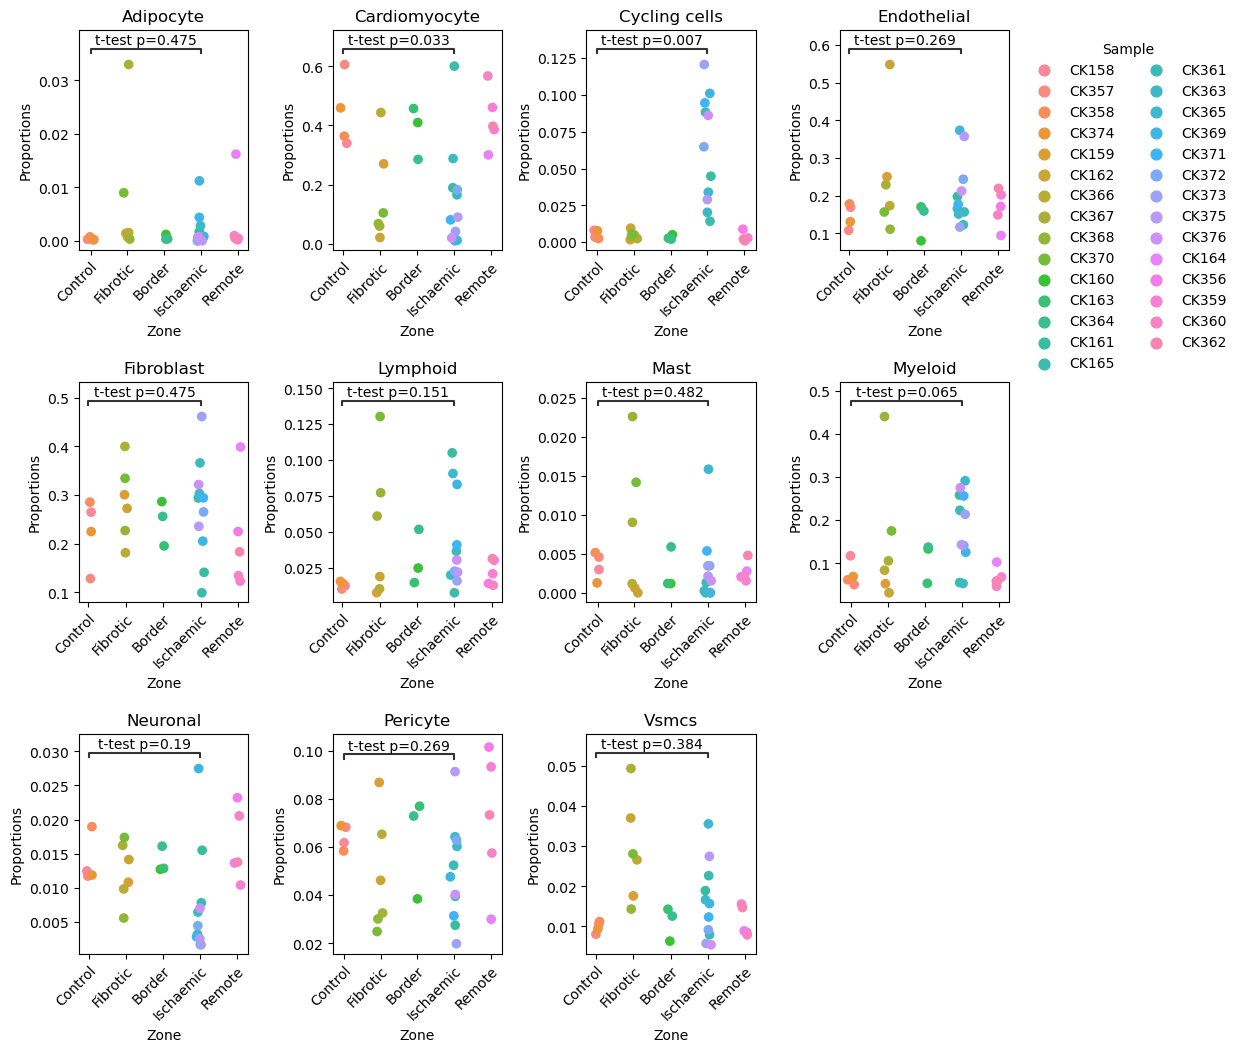

In [11]:
res_snrna.plot(n_columns=4, save=f"{FIG_PATH}/humanMI_rep_all.pdf")

### Without replicates

In [12]:
res_snrna_boot = scanpro(human_MI, clusters_col='cell_type',
                         conds_col='Zone', n_reps=8, conditions=['Control','Ischaemic'],
                         transform='logit')
res_snrna_boot.results.to_csv("results/humanMI_scanpro_norep_logit.tsv", sep="\t")

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 39.97 seconds


In [13]:
res_snrna_boot = scanpro(human_MI, clusters_col='cell_type',
                         conds_col='Zone', n_reps=8, conditions=['Control','Ischaemic'],
                         transform='arcsin')

res_snrna_boot.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 40.17 seconds


,baseline_props,mean_props_Control,mean_props_Ischaemic,p_values
clusters,,,,
Adipocyte,0.002727,0.000197,0.001382,0.330257
Cardiomyocyte,0.336349,0.435557,0.139486,0.000021
Cycling cells,0.015537,0.004474,0.066946,0.000153
Endothelial,0.170411,0.145418,0.188093,0.153107
Fibroblast,0.246664,0.223161,0.296439,0.062627
Lymphoid,0.026403,0.011700,0.034682,0.093176
Mast,0.003749,0.002692,0.002833,0.595996
Myeloid,0.109919,0.074340,0.188807,0.001499
Neuronal,0.012701,0.012110,0.004204,0.186249


In [14]:
res_snrna_boot.results.to_csv("results/humanMI_scanpro_norep_arcsin.tsv", sep="\t")

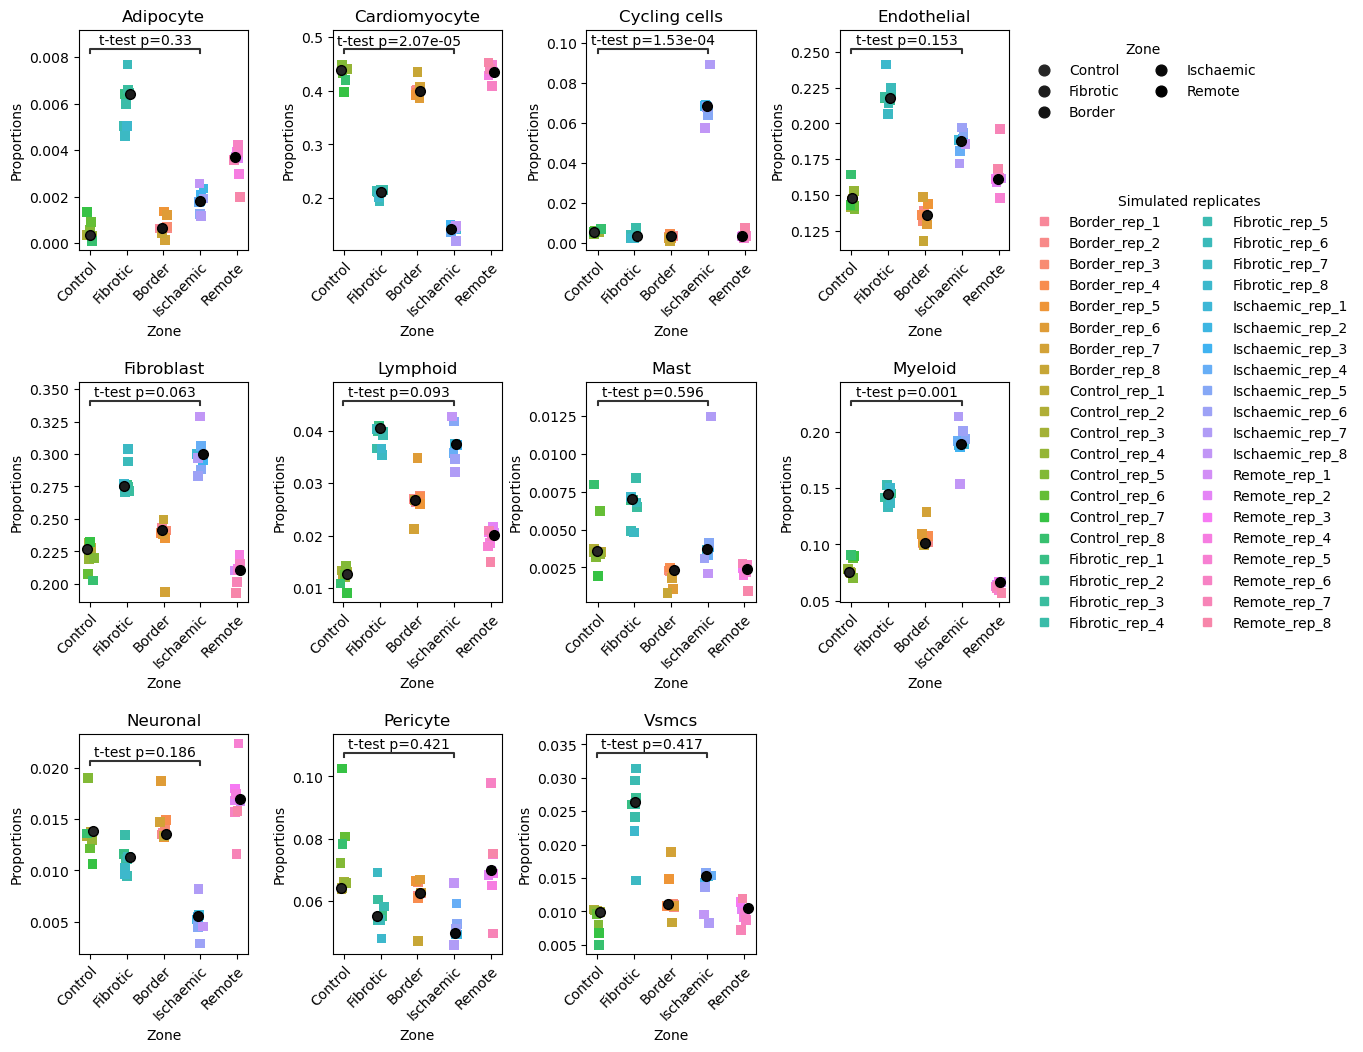

In [15]:
res_snrna_boot.plot(n_columns=4, save=f"{FIG_PATH}/humanMI_norep_all.pdf")

-------------------

## Compare results with/without replicates

In [16]:
annot = human_MI[human_MI['Zone'].isin(['Control', 'Ischaemic'])].value_counts(['Zone', 'cell_type']).reset_index().set_index(['cell_type', 'Zone'])[0].to_dict()
counts = {celltype: {'Ischaemic': 0, "Control": 0} for celltype in human_MI['cell_type'].unique()}

for key in list(annot.keys()):
    celltype = key[0]
    zone = key[1]
    counts[celltype][zone] = annot[(celltype, zone)]
counts

{'Adipocyte': {'Ischaemic': 63, 'Control': 15},
 'Cardiomyocyte': {'Ischaemic': 4866, 'Control': 18310},
 'Cycling cells': {'Ischaemic': 2364, 'Control': 223},
 'Endothelial': {'Ischaemic': 6469, 'Control': 6175},
 'Fibroblast': {'Ischaemic': 10343, 'Control': 9452},
 'Lymphoid': {'Ischaemic': 1295, 'Control': 527},
 'Mast': {'Ischaemic': 128, 'Control': 150},
 'Myeloid': {'Ischaemic': 6518, 'Control': 3155},
 'Neuronal': {'Ischaemic': 193, 'Control': 576},
 'Pericyte': {'Ischaemic': 1714, 'Control': 2669},
 'Vsmcs': {'Ischaemic': 525, 'Control': 411}}

In [17]:
# get results with and without replicates
compare = {'Replicated': -np.log10(res_snrna.results.iloc[:,-1].values),
           'Unreplicated': -np.log10(res_snrna_boot.results.iloc[:,-1].values)}

index_plot = [f"{celltype} ({cluster_count[celltype]} cells)" for celltype in cluster_count.keys()]
index = [f"{celltype}" for celltype in counts.keys()]

compare_plot = pd.DataFrame(compare, index=index_plot)
compare = pd.DataFrame(compare, index=index)

compare

,Replicated,Unreplicated
Adipocyte,0.323547,0.481148
Cardiomyocyte,1.475097,4.683396
Cycling cells,2.148783,3.815511
Endothelial,0.569780,0.815006
Fibroblast,0.323547,1.203241
Lymphoid,0.820274,1.030697
Mast,0.316794,0.224757
Myeloid,1.185541,2.824203
Neuronal,0.720946,0.729906
Pericyte,0.569780,0.375326


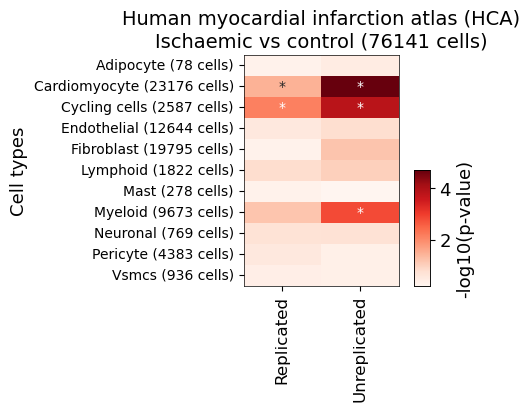

In [18]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# annotation for heatmap
annot = {'Replicated': ['*' if value < 0.05 else '' for value in res_snrna.results.iloc[:,-1].to_list()],
         'Unreplicated': ['*' if value < 0.05 else '' for value in res_snrna_boot.results.iloc[:,-1].to_list()]}

fig, ax = plt.subplots(1, 1, figsize=(2, 3))

cax = inset_axes(ax, width="10%", height="50%", loc='lower left',
                        bbox_to_anchor=(1.1, 0, 1, 1),
                        bbox_transform=ax.transAxes, borderpad=0)

sns.heatmap(compare_plot, annot=pd.DataFrame(annot), fmt='', cmap='Reds',
            ax=ax, cbar_kws={'label': '-log10(p-value)'}, cbar_ax=cax)

ax.set_title(f"Human myocardial infarction atlas (HCA)\nIschaemic vs control ({n_cells} cells)", fontsize=14)
ax.set_ylabel('Cell types', fontsize=13)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=13)
ax.figure.axes[-1].yaxis.label.set_size(13)

# Drawing the frame
for ax_ in [ax, cax]:
    for _, spine in ax_.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.5)

plt.savefig(f'{FIG_PATH}/humanMI_ischaemic_vs_ctrl_heatmap.pdf', dpi=300, bbox_inches='tight')

plt.show()

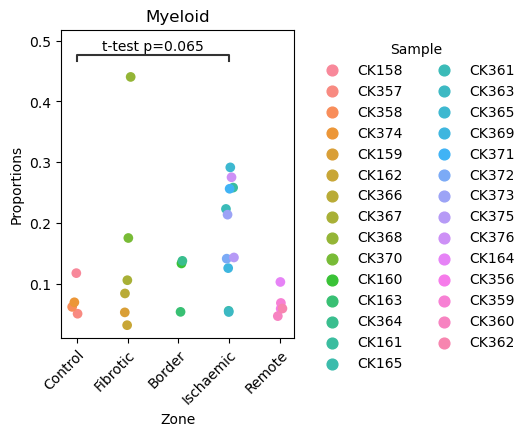

In [19]:
res_snrna.plot(clusters=["Myeloid"], save=f"{FIG_PATH}/humanMI_rep_myeloid.pdf")

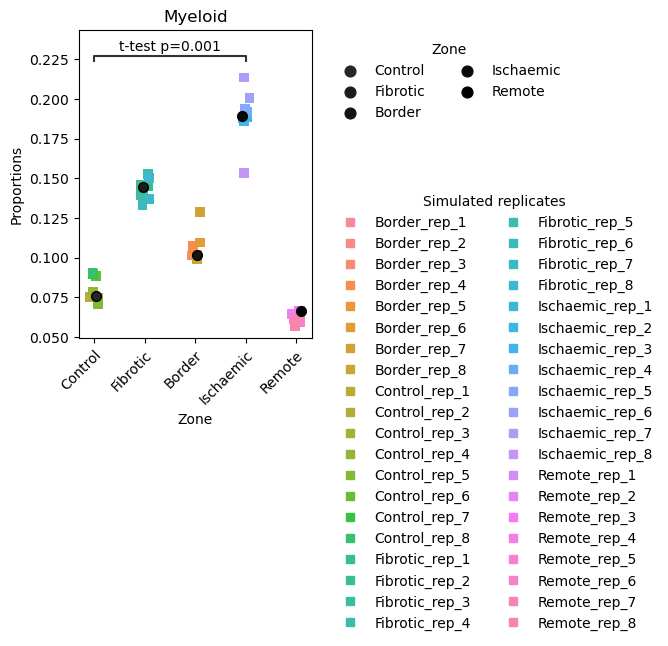

In [20]:
res_snrna_boot.plot(clusters=["Myeloid"], save=f"{FIG_PATH}/humanMI_norep_myeloid.pdf")

# Run scCODA

In [21]:
import pertpy as pt
import anndata as ad

In [22]:
sccoda_adata = ad.AnnData(obs=human_MI)

## With replicates

In [23]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="cell_type", 
                                sample_identifier="Sample", covariate_obs=["Zone"])
# Select control and ischaemic data
sccoda_data.mod["coda_ischaemic"] = sccoda_data["coda"][
    sccoda_data["coda"].obs["Zone"].isin(["Control", "Ischaemic"])].copy()
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda_ischaemic", formula="Zone")

Automatic reference selection! Reference cell type set to Vsmcs

Zero counts encountered in data! Added a pseudocount of 0.5.

In [24]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda_ischaemic")

sample: 100%|██████████| 11000/11000 [03:27<00:00, 53.00it/s, 255 steps of size 1.22e-02. acc. prob=0.88]


In [25]:
sccoda_model.summary(sccoda_data, modality_key="coda_ischaemic")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 15 samples, 11 cell types                                    │
│ Reference cell type                        │ Vsmcs                                                              │
│ Formula                                    │ Zone                                                               │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                Final Parameter  Expected Sample                                                                 │
│ Cell Type                                                                                                       │
│ Adipocyte          -1.401            24.258                                                                     │
│ Cardiomyocyte       3.096          2177.055                                                                     │
│ Cycling cells      -0.302            72.801                                                                     │
│ Endothelial         1.975           709.619                                                                     │
│ Fibroblast          2.368          1051.243                                                                     │
│ Lymphoid            0.145           113.833                                                                     │
│ Mast               -0.960            37.703                                                                     │
│ Myeloid             1.473           429.546                                                                     │
│ Neuronal           -0.263            75.696                                                                     │
│ Pericyte            1.134           306.044                                                                     │
│ Vsmcs              -0.227            78.471                                                                     │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                Final Parameter  Expected Sample  log2-fold change                               │
│ Covariate       Cell Type                                                                                       │
│ ZoneT.Ischaemic Adipocyte           0.000            38.953            0.683                                    │
│                 Cardiomyocyte      -2.118           420.632           -2.372                                    │
│                 Cycling cells       0.000           116.906            0.683                                    │
│                 Endothelial         0.000          1139.526            0.683                                    │
│                 Fibroblast          0.000          1688.114            0.683                                    │
│                 Lymphoid            0.000           182.795            0.683                                    │
│                 Mast                0.000            60.544            0.683                                    │
│                 Myeloid             0.000           689.776            0.683                                    │
│                 Neuronal            0.000           121.555            0.683                                    │
│                 Pericyte            0.000           491.454            0.683                                    │
│                 Vsmcs               0.000           126.011            0.683                                    │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [26]:
# Get credible effects at different FDR levels:
credible_effects_list = []
for fdr in [0.05]:
    sccoda_model.set_fdr(sccoda_data, modality_key="coda_ischaemic", est_fdr=fdr)
    
    credible_effects_table = sccoda_model.credible_effects(sccoda_data, modality_key="coda_ischaemic").to_frame(name="credible_effect")
    credible_effects_table["fdr"] = fdr
    credible_effects_list.append(credible_effects_table)

credible_effects = pd.concat(credible_effects_list)
credible_effects

credible_effect   fdr
Covariate         Cell Type                           
Zone[T.Ischaemic] Adipocyte                False  0.05
                  Cardiomyocyte             True  0.05
                  Cycling cells            False  0.05
                  Endothelial              False  0.05
                  Fibroblast               False  0.05
                  Lymphoid                 False  0.05
                  Mast                     False  0.05
                  Myeloid                  False  0.05
                  Neuronal                 False  0.05
                  Pericyte                 False  0.05
                  Vsmcs                    False  0.05

In [27]:
credible_effects.to_csv("results/humanMI_sccoda_rep.tsv", sep="\t")

## Without replicates

In [28]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="cell_type", 
                                sample_identifier="Zone", covariate_obs=["Zone"])
# Select control and ischaemic data
sccoda_data.mod["coda_ischaemic"] = sccoda_data["coda"][
    sccoda_data["coda"].obs["Zone"].isin(["Control", "Ischaemic"])].copy()
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda_ischaemic", formula="Zone")

Automatic reference selection! Reference cell type set to Mast

In [29]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda_ischaemic")

sample: 100%|██████████| 11000/11000 [00:39<00:00, 281.15it/s, 255 steps of size 1.46e-02. acc. prob=0.88]


In [30]:
sccoda_model.summary(sccoda_data, modality_key="coda_ischaemic")

                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 2 samples, 11 cell types                                    │
│ Reference cell type                         │ Mast                                                              │
│ Formula                                     │ Zone                                                              │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                Final Parameter  Expected Sample                                                                 │
│ Cell Type                                                                                                       │
│ Adipocyte          -0.700            53.053                                                                     │
│ Cardiomyocyte       5.039         16486.540                                                                     │
│ Cycling cells       1.129           330.399                                                                     │
│ Endothelial         3.965          5632.449                                                                     │
│ Fibroblast          4.405          8745.544                                                                     │
│ Lymphoid            1.713           592.470                                                                     │
│ Mast                0.352           151.912                                                                     │
│ Myeloid             3.378          3131.601                                                                     │
│ Neuronal            1.289           387.726                                                                     │
│ Pericyte            3.000          2145.868                                                                     │
│ Vsmcs               1.352           412.939                                                                     │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                Final Parameter  Expected Sample  log2-fold change                               │
│ Covariate       Cell Type                                                                                       │
│ ZoneT.Ischaemic Adipocyte           0.000            73.842            0.477                                    │
│                 Cardiomyocyte      -1.353          5928.435           -1.476                                    │
│                 Cycling cells       1.717          2560.307            2.954                                    │
│                 Endothelial         0.000          7839.521            0.477                                    │
│                 Fibroblast          0.000         12172.480            0.477                                    │
│                 Lymphoid            0.000           824.628            0.477                                    │
│                 Mast                0.000           211.438            0.477                                    │
│                 Myeloid             0.000          4358.717            0.477                                    │
│                 Neuronal            0.000           539.657            0.477                                    │
│                 Pericyte            0.000          2986.726            0.477                                    │
│                 Vsmcs               0.000           574.749            0.477                                    │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [31]:
# Get credible effects at different FDR levels:
credible_effects_list = []
for fdr in [0.05]:
    sccoda_model.set_fdr(sccoda_data, modality_key="coda_ischaemic", est_fdr=fdr)
    
    credible_effects_table = sccoda_model.credible_effects(sccoda_data, modality_key="coda_ischaemic").to_frame(name="credible_effect")
    credible_effects_table["fdr"] = fdr
    credible_effects_list.append(credible_effects_table)

credible_effects = pd.concat(credible_effects_list)
credible_effects

credible_effect   fdr
Covariate         Cell Type                           
Zone[T.Ischaemic] Adipocyte                False  0.05
                  Cardiomyocyte             True  0.05
                  Cycling cells             True  0.05
                  Endothelial              False  0.05
                  Fibroblast               False  0.05
                  Lymphoid                 False  0.05
                  Mast                     False  0.05
                  Myeloid                  False  0.05
                  Neuronal                 False  0.05
                  Pericyte                 False  0.05
                  Vsmcs                    False  0.05

In [32]:
credible_effects.to_csv("results/humanMI_sccoda_norep.tsv", sep="\t")

## Compare scanpro and scCODA

In [33]:
sccoda_rep = pd.read_csv("results/humanMI_sccoda_rep.tsv", sep="\t", index_col="Cell Type").drop(["Covariate", "fdr"], axis=1)
sccoda_rep["sccoda_rep"] = [1 if res else 0 for res in sccoda_rep["credible_effect"]]
sccoda_rep.drop("credible_effect", axis=1, inplace=True)

sccoda_norep = pd.read_csv("results/humanMI_sccoda_norep.tsv", sep="\t", index_col="Cell Type").drop(["Covariate", "fdr"], axis=1)
sccoda_norep["sccoda_norep"] = [1 if res else 0 for res in sccoda_norep["credible_effect"]]
sccoda_norep.drop("credible_effect", axis=1, inplace=True)

In [34]:
compare.columns = ["scanpro_rep", "scanpro_norep"]
results_compare = pd.concat([compare, sccoda_rep, sccoda_norep], join='outer', axis=1)
results_compare

,scanpro_rep,scanpro_norep,sccoda_rep,sccoda_norep
Adipocyte,0.323547,0.481148,0,0
Cardiomyocyte,1.475097,4.683396,1,1
Cycling cells,2.148783,3.815511,0,1
Endothelial,0.569780,0.815006,0,0
Fibroblast,0.323547,1.203241,0,0
Lymphoid,0.820274,1.030697,0,0
Mast,0.316794,0.224757,0,0
Myeloid,1.185541,2.824203,0,0
Neuronal,0.720946,0.729906,0,0
Pericyte,0.569780,0.375326,0,0


In [35]:
annot_sccoda_rep = sccoda_rep.replace({1: "*", 0: ""})
annot_sccoda_norep = sccoda_norep.replace({1: "*", 0: ""})

annot_scanpro = pd.DataFrame(annot, index=annot_sccoda_rep.index)
annot_scanpro.columns = ["scanpro_rep", "scanpro_norep"]
results_annot = pd.concat([annot_scanpro, annot_sccoda_rep, annot_sccoda_norep], join='outer', axis=1)

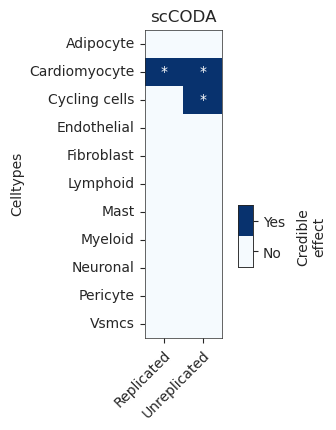

In [36]:
# Get data
values = results_compare
n_rows = len(values)

fig, ax = plt.subplots(figsize=(1., 4.))
plt.subplots_adjust(wspace=0.15, hspace=0.03)

percent_cax = inset_axes(ax,
                         width="20%", height="20%",
                         loc='lower left',
                         bbox_to_anchor=(1.2, 0.23, 1, 1),
                         bbox_transform=ax.transAxes, borderpad=0)
percent_cax.set_frame_on(True)

########## Sccoda ##########
columns = ["sccoda_rep", "sccoda_norep"]

colors = sns.color_palette("Blues", n_colors=100).as_hex()
colors = [colors[0], colors[-1]]

sns.heatmap(values[columns], 
            annot=results_annot[columns], fmt='',
            cmap=colors,
            ax=ax, yticklabels=True, xticklabels=True,
            cbar_ax=percent_cax,
            cbar_kws={"label": "Credible effect"})


#Ticks
ax.set_xticks(ax.get_xticks(), ["Replicated",  "Unreplicated"], rotation=45, ha='right', rotation_mode='anchor')

#scCoda cmap to categorical
colorbar = ax.collections[0].colorbar
colorbar.set_label("Credible\neffect", labelpad=8)
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(["No", "Yes"])

#Titl
ax.set_title("scCODA")

### Set format of labels
ax.set_yticks(ax.get_yticks(), ax.get_yticklabels(), rotation=0, ha='right', rotation_mode='anchor')
ax.set_ylabel("")
ax.set_xlabel("")

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(0.5)

_ = ax.set_ylabel("Celltypes")

#Border around cbars
for cax in [percent_cax]:
    for _, spine in cax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.5)

# Background for NAs

ax.patch.set_facecolor('lightgrey')
ax.patch.set_edgecolor('grey')
ax.patch.set_hatch('//')

# Set title of plot
title = f"Human myocardial infarction atlas (HCA)\nIschaemic vs control ({n_cells} cells)"
#ax.text(1.2, 1.15, title, transform=axarr[1].transAxes, fontsize=13, ha="center")

# Save final figure
plt.savefig(f"{FIG_PATH}/humanMI_sccoda.pdf", bbox_inches="tight")

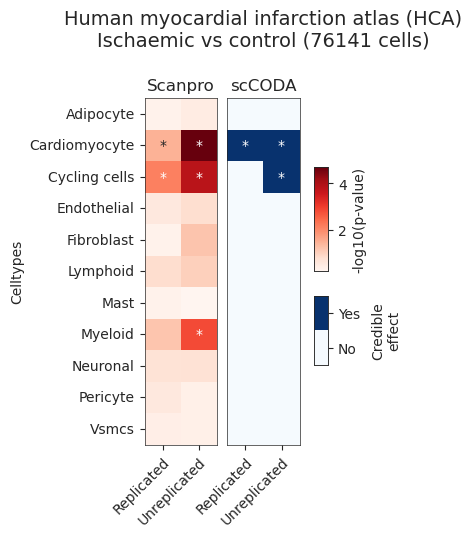

In [37]:
# Get data
values = results_compare
n_rows = len(values)

# Initialize plotting grid
fig, axarr = plt.subplots(1,2, figsize=(2., 4.5), gridspec_kw={'width_ratios': [2,2]})
axarr = axarr.flatten()
plt.subplots_adjust(wspace=0.15, hspace=0.03)

############### Colorbars ################

ax = axarr[1]
pvalue_cax = inset_axes(ax,
                        width="20%", height="30%",
                        loc='lower left',
                        bbox_to_anchor=(1.2, 0.5, 1, 1),
                        bbox_transform=ax.transAxes, borderpad=0)
pvalue_cax.set_frame_on(True)

percent_cax = inset_axes(ax,
                         width="20%", height="20%",
                         loc='lower left',
                         bbox_to_anchor=(1.2, 0.23, 1, 1),
                         bbox_transform=ax.transAxes, borderpad=0)
percent_cax.set_frame_on(True)

#Get max p-value to set for scanpro/propeller
max_value = values.max().max()  

########## Scanpro ##########
columns = ["scanpro_rep", "scanpro_norep"]

# First row
ax = axarr[0]
sns.heatmap(values[columns], 
            annot=results_annot[columns], fmt='',
            ax=ax, cmap='Reds', vmax=max_value, cbar_ax=pvalue_cax, xticklabels=True, 
            cbar_kws={"label": "-log10(p-value)"})

#xticks
ax.set_xticks(ax.get_xticks(), ["Replicated", "Unreplicated"], 
              rotation=45, ha='right', rotation_mode='anchor')


########## Sccoda ##########
columns = ["sccoda_rep", "sccoda_norep"]

ax = axarr[1]
colors = sns.color_palette("Blues", n_colors=100).as_hex()
colors = [colors[0], colors[-1]]

sns.heatmap(values[columns], 
            annot=results_annot[columns], fmt='',
            cmap=colors,
            ax=ax, yticklabels=False, xticklabels=True,
            cbar_ax=percent_cax,
            cbar_kws={"label": "Credible effect"})


#Ticks
ax.set_xticks(ax.get_xticks(), ["Replicated",  "Unreplicated"], rotation=45, ha='right', rotation_mode='anchor')

#scCoda cmap to categorical
colorbar = axarr[1].collections[0].colorbar
colorbar.set_label("Credible\neffect", labelpad=8)
colorbar.set_ticks([0.25,0.75])
colorbar.set_ticklabels(["No", "Yes"])


############ Final adjustments ##############

#Titles
axarr[0].set_title("Scanpro")
axarr[1].set_title("scCODA")

### Set format of labels
for ax in axarr:
    ax.set_yticks(ax.get_yticks(), ax.get_yticklabels(), rotation=0, ha='right', rotation_mode='anchor')
    ax.set_ylabel("")
    ax.set_xlabel("")

    # Drawing the frame
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.5)

_ = axarr[0].set_ylabel("Celltypes")

#Border around cbars
for cax in [pvalue_cax, percent_cax]:
    for _, spine in cax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.5)

# Background for NAs
for ax in axarr:
    ax.patch.set_facecolor('lightgrey')
    ax.patch.set_edgecolor('grey')
    ax.patch.set_hatch('//')

# Set title of plot
title = f"Human myocardial infarction atlas (HCA)\nIschaemic vs control ({n_cells} cells)"
axarr[1].text(0.5, 1.15, title, transform=axarr[1].transAxes, fontsize=14, ha="center")

# Save final figure
plt.savefig(f"{FIG_PATH}/humanMI_scanpro_vs_sccoda.pdf", bbox_inches="tight")

# test one sample per condition

In [38]:
from statsmodels.stats.multitest import multipletests

In [39]:
sns.set_theme(context='paper', style='ticks', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)

In [40]:
sample_counts = human_MI[human_MI.Zone.isin(['Control', 'Ischaemic'])].value_counts(['Sample', 'Zone']).to_frame('counts').reset_index()
sample_counts_celltype = human_MI[human_MI.Zone.isin(['Control', 'Ischaemic'])].value_counts(['Sample', 'Zone', 'cell_type']).to_frame('counts').reset_index()
sample_counts

,Sample,Zone,counts
0,CK158,Control,11416
1,CK358,Control,10873
2,CK357,Control,10682
3,CK374,Control,8692
4,CK361,Ischaemic,6043
5,CK371,Ischaemic,5026
6,CK373,Ischaemic,4339
7,CK363,Ischaemic,3898
8,CK365,Ischaemic,3654
9,CK372,Ischaemic,3166


In [41]:
# make all possible combination of samples
control_samples = human_MI[human_MI.Zone.isin(['Control'])]['Sample'].unique()
ischaemic_samples = human_MI[human_MI.Zone.isin(['Ischaemic'])]['Sample'].unique()
all_combs = [[x, y] for x in control_samples for y in ischaemic_samples]

# remove CK357 due to high number of cardimyocytes
control_samples = control_samples[~np.isin(control_samples, ['CK357'])]
# remove CK161 due to low cell count
ischaemic_samples = ischaemic_samples[~np.isin(ischaemic_samples, ['CK161', 'CK165', 'CK369', 'CK375', 'CK373', 'CK373'])]  # 'CK376', 'CK363'

combs = [[x, y] for x in control_samples for y in ischaemic_samples]
combs

[['CK158', 'CK361'],
 ['CK158', 'CK363'],
 ['CK158', 'CK365'],
 ['CK158', 'CK371'],
 ['CK158', 'CK376'],
 ['CK158', 'CK372'],
 ['CK358', 'CK361'],
 ['CK358', 'CK363'],
 ['CK358', 'CK365'],
 ['CK358', 'CK371'],
 ['CK358', 'CK376'],
 ['CK358', 'CK372'],
 ['CK374', 'CK361'],
 ['CK374', 'CK363'],
 ['CK374', 'CK365'],
 ['CK374', 'CK371'],
 ['CK374', 'CK376'],
 ['CK374', 'CK372']]

In [42]:
len(combs)

18

## Scanpro

### All combinations

In [43]:
results_all_dfs = []
for i, sample_comb in enumerate(all_combs):
    tmp = human_MI[human_MI.Zone.isin(['Control', 'Ischaemic'])]
    ex_sample_ids = tmp[~tmp.Sample.isin(sample_comb)].index

    human_MI_sub = human_MI.drop(ex_sample_ids)
    n_reps = 5

    result = scanpro(human_MI_sub, clusters_col='cell_type', samples_col='Sample',
                         conds_col='Zone', n_reps=n_reps, conditions=['Control','Ischaemic'],
                         transform='arcsin', verbosity=0).results
    result['comb'] = f'{sample_comb}'
    result[['ctrl', 'ischaemic']] = sample_comb
    results_all_dfs.append(result)

In [44]:
results_all = pd.concat(results_all_dfs)
results_all = results_all.reset_index()
results_all['adjusted_p_values'] = multipletests(results_all["p_values"], method='fdr_bh')[1]
results_all['-log10(adjusted-p-value)'] = -np.log10(results_all["adjusted_p_values"])

# Estimate whether calls are correct - celltypes Cardiomyocyte, Cycling cells and Cycling cells should be different
differential_groups = ['Cardiomyocyte', 'Cycling cells', 'Myeloid']
# Assign whether p-values are correct
results_all["correct"] = [row["adjusted_p_values"] < 0.05 if row["clusters"] in differential_groups else row["adjusted_p_values"] >= 0.05 for i, row in results_all.iterrows()]

results_all

,clusters,baseline_props,mean_props_Control,mean_props_Ischaemic,p_values,comb,ctrl,ischaemic,adjusted_p_values,-log10(adjusted-p-value),correct
0,Adipocyte,0.003510,0.000000,0.000730,0.716765,"['CK158', 'CK161']",CK158,CK161,0.735449,0.133447,True
1,Cardiomyocyte,0.355062,0.340371,0.182540,0.142708,"['CK158', 'CK161']",CK158,CK161,0.321259,0.493145,False
2,Cycling cells,0.004003,0.005646,0.038928,0.204593,"['CK158', 'CK161']",CK158,CK161,0.423176,0.373479,False
3,Endothelial,0.173050,0.163572,0.190232,0.598662,"['CK158', 'CK161']",CK158,CK161,0.686617,0.163285,True
4,Fibroblast,0.239873,0.259183,0.134808,0.190671,"['CK158', 'CK161']",CK158,CK161,0.402989,0.394706,True
...,...,...,...,...,...,...,...,...,...,...,...
479,Mast,0.003602,0.000683,0.001598,0.701891,"['CK374', 'CK375']",CK374,CK375,0.731137,0.136001,True
480,Myeloid,0.097627,0.066441,0.143426,0.038976,"['CK374', 'CK375']",CK374,CK375,0.128328,0.891678,False
481,Neuronal,0.013976,0.010357,0.001861,0.169735,"['CK374', 'CK375']",CK374,CK375,0.371727,0.429776,True
482,Pericyte,0.064681,0.067844,0.089009,0.373478,"['CK374', 'CK375']",CK374,CK375,0.625051,0.204084,True


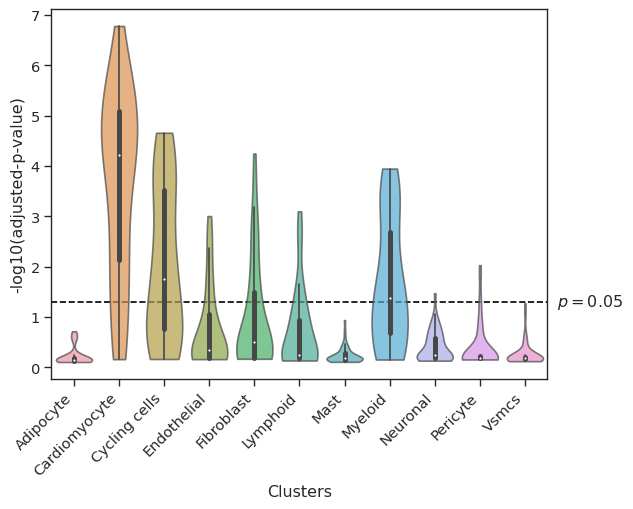

In [45]:
fig, ax = plt.subplots(1)

sns.violinplot(data=results_all, x="clusters", y="-log10(adjusted-p-value)",
               cut=0, scale="width", ax=ax)
for violin in ax.collections[::2]:
    violin.set_alpha(0.7)
    ax.set_xlabel("Clusters")

#Plot data points on top of violins
#sns.swarmplot(data=results, x="clusters", y="-log10(adjusted-p-value)", color="grey", ax=ax,
#              dodge=True)

# Plot threshold line
pvalue_threshold = -np.log10(0.05)
ax.axhline(pvalue_threshold, zorder=0, color="black", ls="--")
ax.text(ax.get_xlim()[1], pvalue_threshold, "  $\it{p=0.05}$", va="center")

# Set xticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Save final figure
plt.savefig(f"{FIG_PATH}/humanMI_scanpro_norep_all_combs.pdf", bbox_inches="tight")

In [46]:
results_all.groupby('clusters')['correct'].mean()

clusters
Adipocyte        1.000000
Cardiomyocyte    0.840909
Cycling cells    0.590909
Endothelial      0.795455
Fibroblast       0.681818
Lymphoid         0.818182
Mast             1.000000
Myeloid          0.522727
Neuronal         0.977273
Pericyte         0.931818
Vsmcs            1.000000
Name: correct, dtype: float64

In [47]:
results_all.to_csv("results/humanMI_scanpro_all_combs.tsv", sep="\t")

## Filtered combinations 

In [48]:
results_dfs = []
for i, sample_comb in enumerate(combs):
    tmp = human_MI[human_MI.Zone.isin(['Control', 'Ischaemic'])]
    ex_sample_ids = tmp[~tmp.Sample.isin(sample_comb)].index

    human_MI_sub = human_MI.drop(ex_sample_ids)
    n_reps = 5

    result = scanpro(human_MI_sub, clusters_col='cell_type', samples_col='Sample',
                         conds_col='Zone', n_reps=n_reps, conditions=['Control','Ischaemic'],
                         transform='arcsin', verbosity=0).results
    result['comb'] = f'{sample_comb}'
    result[['ctrl', 'ischaemic']] = sample_comb
    results_dfs.append(result)

In [49]:
results = pd.concat(results_dfs)
results = results.reset_index()
results['adjusted_p_values'] = multipletests(results["p_values"], method='fdr_bh')[1]
results['-log10(adjusted-p-value)'] = -np.log10(results["adjusted_p_values"])

# Estimate whether calls are correct - celltypes Cardiomyocyte, Cycling cells and Cycling cells should be different
differential_groups = ['Cardiomyocyte', 'Cycling cells', 'Myeloid']
# Assign whether p-values are correct
results["correct"] = [row["adjusted_p_values"] < 0.05 if row["clusters"] in differential_groups else row["adjusted_p_values"] >= 0.05 for i, row in results.iterrows()]

results

,clusters,baseline_props,mean_props_Control,mean_props_Ischaemic,p_values,comb,ctrl,ischaemic,adjusted_p_values,-log10(adjusted-p-value),correct
0,Adipocyte,0.003388,0.000076,0.000402,0.634288,"['CK158', 'CK361']",CK158,CK361,0.698308,0.155953,True
1,Cardiomyocyte,0.347171,0.338420,0.164189,0.000364,"['CK158', 'CK361']",CK158,CK361,0.002622,2.581423,True
2,Cycling cells,0.007648,0.007275,0.084713,0.000032,"['CK158', 'CK361']",CK158,CK361,0.000373,3.428012,True
3,Endothelial,0.170667,0.170922,0.121449,0.084499,"['CK158', 'CK361']",CK158,CK361,0.220898,0.655808,True
4,Fibroblast,0.242756,0.265215,0.295596,0.397516,"['CK158', 'CK361']",CK158,CK361,0.677798,0.168900,True
...,...,...,...,...,...,...,...,...,...,...,...
193,Mast,0.003631,0.000658,0.002794,0.548611,"['CK374', 'CK372']",CK374,CK372,0.683176,0.165467,True
194,Myeloid,0.097708,0.066336,0.140907,0.033530,"['CK374', 'CK372']",CK374,CK372,0.123593,0.908005,False
195,Neuronal,0.013991,0.009486,0.003225,0.392494,"['CK374', 'CK372']",CK374,CK372,0.677798,0.168900,True
196,Pericyte,0.064049,0.064891,0.058381,0.623333,"['CK374', 'CK372']",CK374,CK372,0.697155,0.156670,True


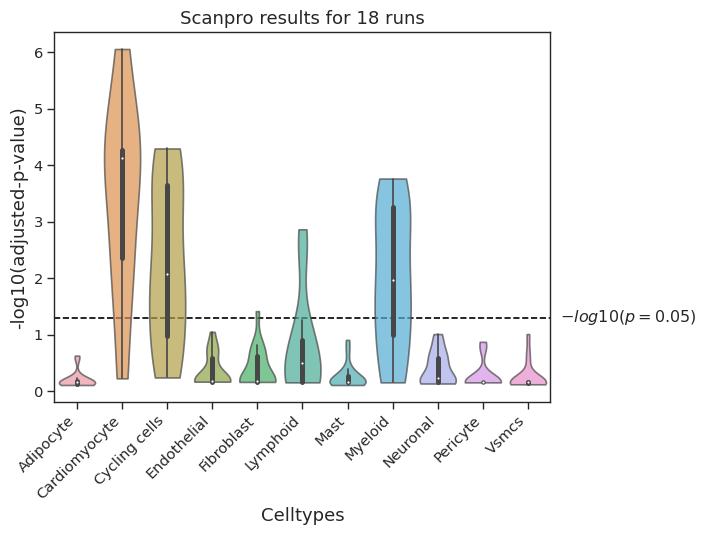

In [50]:
fig, ax = plt.subplots(1)

sns.violinplot(data=results, x="clusters", y="-log10(adjusted-p-value)",
               cut=0, scale="width", ax=ax)
for violin in ax.collections[::2]:
    violin.set_alpha(0.7)
    ax.set_xlabel("Clusters")

#Plot data points on top of violins
#sns.swarmplot(data=results, x="clusters", y="-log10(adjusted-p-value)", color="grey", ax=ax,
#              dodge=True)

# Plot threshold line
pvalue_threshold = -np.log10(0.05)
ax.axhline(pvalue_threshold, zorder=0, color="black", ls="--")
ax.text(ax.get_xlim()[1], pvalue_threshold, "  $-log10(\it{p=0.05})$", va="center")

# Set xticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

ax.set_ylabel("-log10(adjusted-p-value)", fontsize=13)
ax.set_xlabel("Celltypes", fontsize=13)

ax.set_title("Scanpro results for 18 runs", fontsize=13)

# Save final figure
plt.savefig(f"{FIG_PATH}/humanMI_scanpro_norep_filtered_combs.pdf", bbox_inches="tight")

In [51]:
results.groupby('clusters')['correct'].mean()

clusters
Adipocyte        1.000000
Cardiomyocyte    0.888889
Cycling cells    0.722222
Endothelial      1.000000
Fibroblast       0.944444
Lymphoid         0.833333
Mast             1.000000
Myeloid          0.666667
Neuronal         1.000000
Pericyte         1.000000
Vsmcs            1.000000
Name: correct, dtype: float64

In [52]:
results.to_csv("results/humanMI_scanpro_combs.tsv", sep="\t")

### Sample details

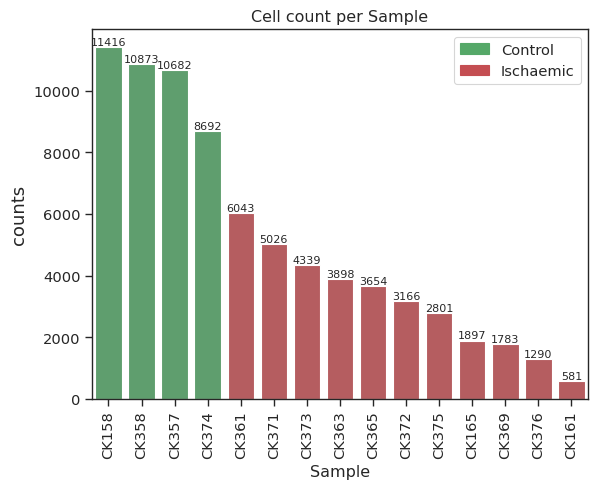

In [53]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(1)

# map names to colors
colors = ['g' if zone == 'Control' else 'r' for zone in sample_counts['Zone']]
cmap = dict(zip(sample_counts['Zone'], colors))
# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]

sns.barplot(data=sample_counts, x='Sample', y='counts', palette=colors)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.bar_label(ax.containers[0], fontsize=8)
# add the legend
ax.legend(patches, ['Control', 'Ischaemic'])
ax.set_title('Cell count per Sample')
ax.set_ylabel("counts", fontsize=13)

# Save final figure
plt.savefig(f"{FIG_PATH}/humanMI_all_samples_counts.pdf", bbox_inches="tight")

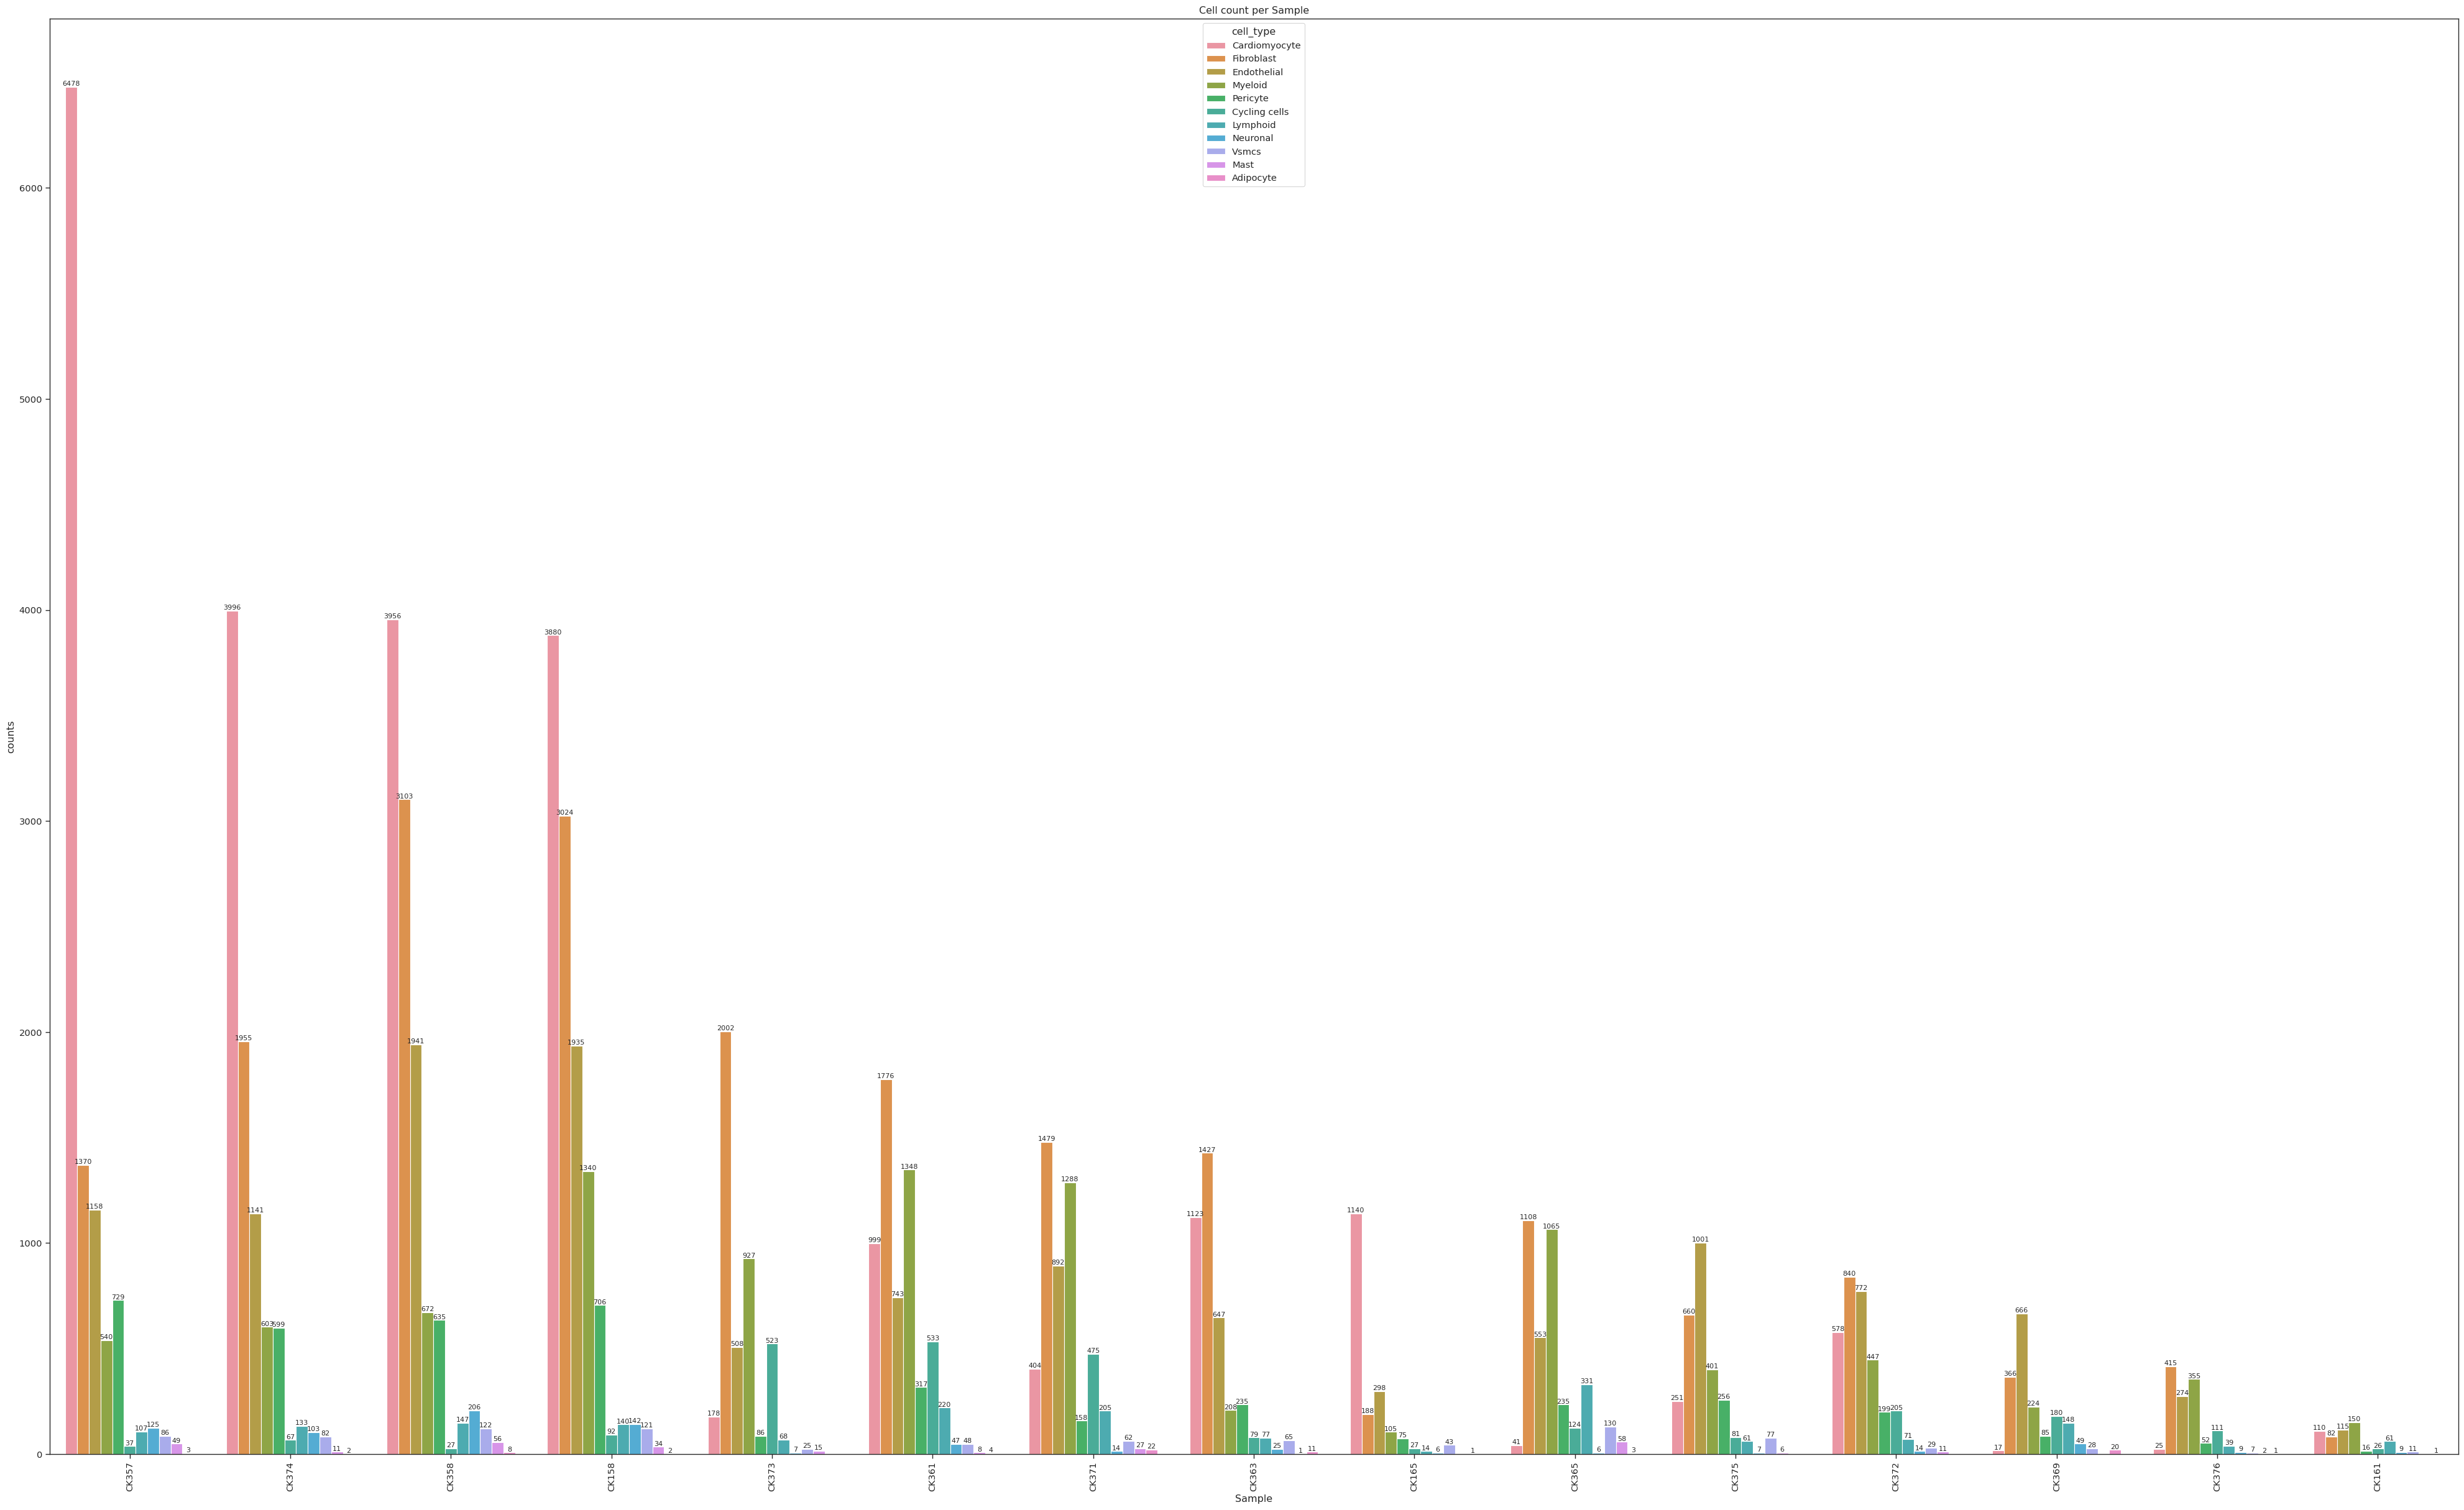

In [54]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, figsize=(50, 30))

sns.barplot(data=sample_counts_celltype, x='Sample', y='counts', hue='cell_type', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

ax.set_title('Cell count per Sample')

plt.show()

### Used samples

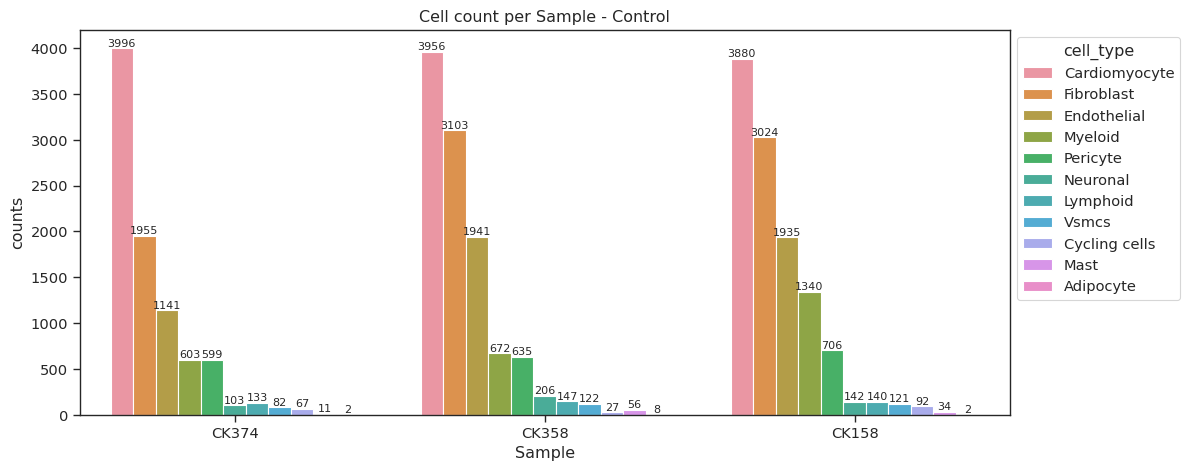

In [55]:
# used samples
used_sample_counts_celltype = sample_counts_celltype[sample_counts_celltype['Sample'].isin(list(ischaemic_samples) + list(control_samples))]
used_sample_counts = sample_counts[sample_counts['Sample'].isin(list(ischaemic_samples) + list(control_samples))]

fig, ax = plt.subplots(1, figsize=(12, 5))
sns.barplot(data=used_sample_counts_celltype[used_sample_counts_celltype['Zone']=='Control'],
                x='Sample', y='counts', hue='cell_type', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

ax.set_title(f'Cell count per Sample - Control')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

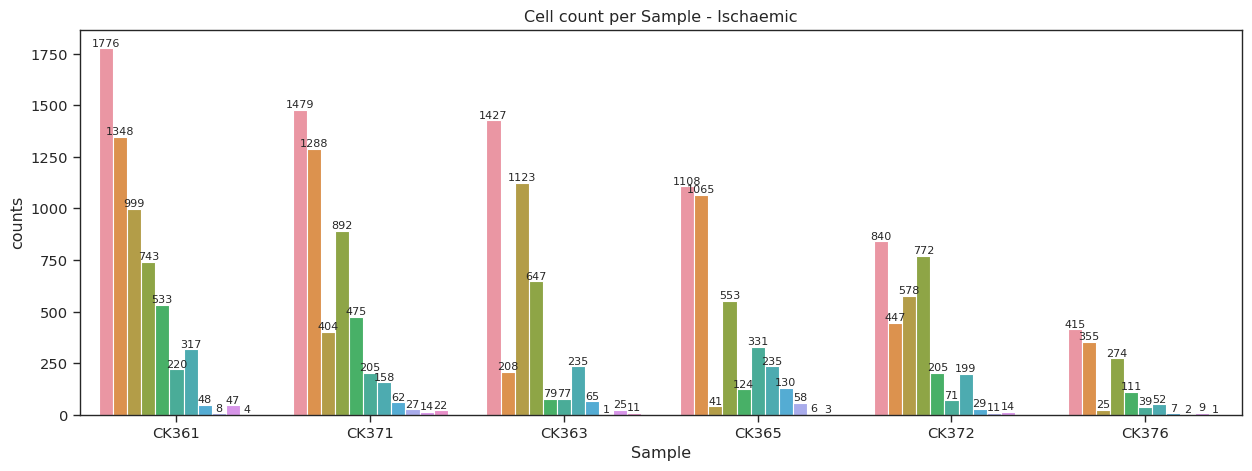

In [56]:
# used samples
used_sample_counts_celltype = sample_counts_celltype[sample_counts_celltype['Sample'].isin(list(ischaemic_samples) + list(control_samples))]
used_sample_counts = sample_counts[sample_counts['Sample'].isin(list(ischaemic_samples) + list(control_samples))]

fig, ax = plt.subplots(1, figsize=(15, 5))
sns.barplot(data=used_sample_counts_celltype[used_sample_counts_celltype['Zone']=='Ischaemic'],
                x='Sample', y='counts', hue='cell_type', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

ax.set_title(f'Cell count per Sample - Ischaemic')
ax.get_legend().set_visible(False)

plt.show()

### Excluded samples

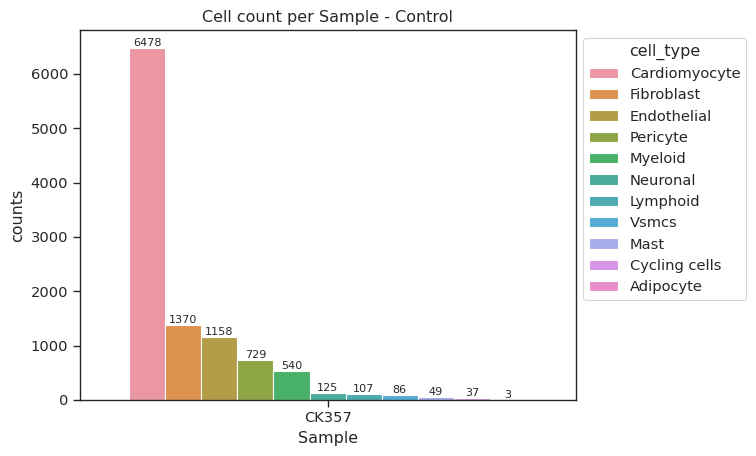

In [57]:
# excluded samples
unused_sample_counts_celltype = sample_counts_celltype[~sample_counts_celltype['Sample'].isin(list(ischaemic_samples) + list(control_samples))]
unused_sample_counts = sample_counts[~sample_counts['Sample'].isin(list(ischaemic_samples) + list(control_samples))]

ax = sns.barplot(data=unused_sample_counts_celltype[unused_sample_counts_celltype['Zone']=='Control'],
            x='Sample', y='counts', hue='cell_type')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

ax.set_title(f'Cell count per Sample - Control')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

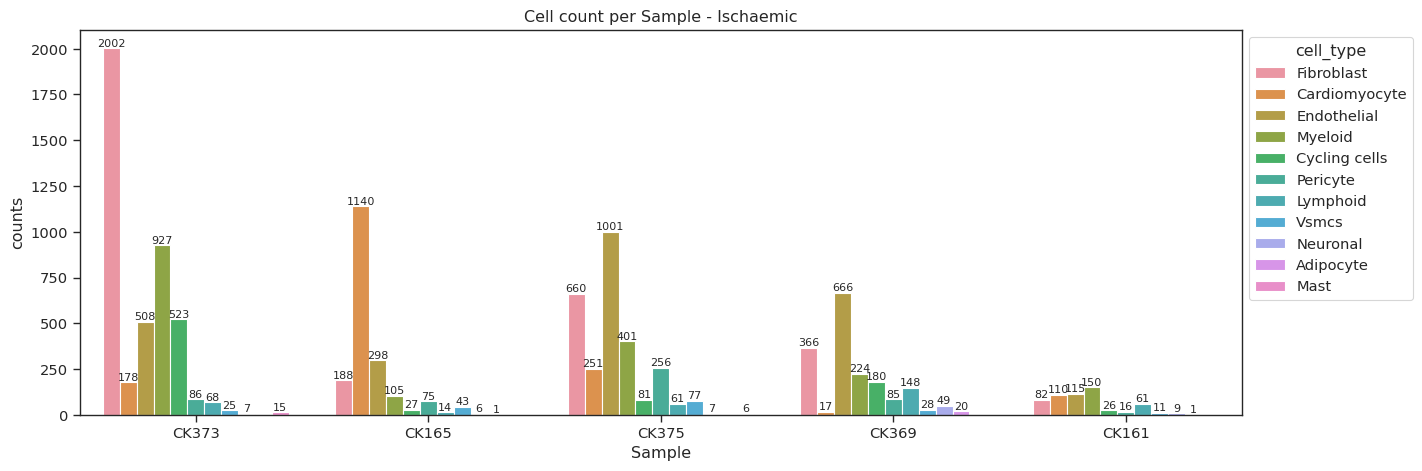

In [58]:
fig, ax = plt.subplots(1, figsize=(15, 5))

sns.barplot(data=unused_sample_counts_celltype[unused_sample_counts_celltype['Zone']=='Ischaemic'],
            x='Sample', y='counts', hue='cell_type', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

ax.set_title(f'Cell count per Sample - Ischaemic')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

## scCODA

### Filtered combinations

In [59]:
results_sccoda_dfs = []
fdr = 0.05
for i, sample_comb in enumerate(combs):
    # keep only two samples (one control and one ischaemic)
    tmp = human_MI[human_MI.Zone.isin(['Control', 'Ischaemic'])]
    ex_sample_ids = tmp[~tmp.Sample.isin(sample_comb)].index
    human_MI_sub = human_MI.drop(ex_sample_ids)
    
    sccoda_adata = ad.AnnData(obs=human_MI_sub)
    sccoda_model = pt.tl.Sccoda()
    sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="cell_type", 
                                    sample_identifier="Sample", covariate_obs=["Zone"])
    # Select control and ischaemic data
    sccoda_data.mod["coda_ischaemic"] = sccoda_data["coda"][
        sccoda_data["coda"].obs["Zone"].isin(["Control", "Ischaemic"])].copy()
    sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda_ischaemic", formula="Zone")
    # run scCODA
    sccoda_model.run_nuts(sccoda_data, modality_key="coda_ischaemic")
    
    sccoda_model.set_fdr(sccoda_data, modality_key="coda_ischaemic", est_fdr=fdr)
    
    result = sccoda_model.credible_effects(sccoda_data, modality_key="coda_ischaemic").to_frame(name="credible_effect")
    result["fdr"] = fdr
    
    result['comb'] = f'{sample_comb}'
    result[['ctrl', 'ischaemic']] = sample_comb
    results_sccoda_dfs.append(result)

Automatic reference selection! Reference cell type set to Adipocyte

sample: 100%|██████████| 11000/11000 [00:36<00:00, 298.56it/s, 511 steps of size 1.42e-02. acc. prob=0.82]


Automatic reference selection! Reference cell type set to Pericyte

sample: 100%|██████████| 11000/11000 [00:36<00:00, 304.23it/s, 127 steps of size 2.04e-02. acc. prob=0.89]


Automatic reference selection! Reference cell type set to Pericyte

sample: 100%|██████████| 11000/11000 [01:03<00:00, 173.88it/s, 35 steps of size 8.00e-03. acc. prob=0.94]  


Automatic reference selection! Reference cell type set to Vsmcs

sample: 100%|██████████| 11000/11000 [00:26<00:00, 422.15it/s, 127 steps of size 3.07e-02. acc. prob=0.66]


Automatic reference selection! Reference cell type set to Adipocyte

sample: 100%|██████████| 11000/11000 [00:43<00:00, 253.71it/s, 255 steps of size 1.29e-02. acc. prob=0.84]


Automatic reference selection! Reference cell type set to Fibroblast

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [00:36<00:00, 303.79it/s, 255 steps of size 1.72e-02. acc. prob=0.84]


Automatic reference selection! Reference cell type set to Adipocyte

sample: 100%|██████████| 11000/11000 [00:46<00:00, 237.19it/s, 255 steps of size 1.10e-02. acc. prob=0.88]


Automatic reference selection! Reference cell type set to Pericyte

sample: 100%|██████████| 11000/11000 [00:32<00:00, 343.20it/s, 127 steps of size 2.09e-02. acc. prob=0.91]


Automatic reference selection! Reference cell type set to Adipocyte

sample: 100%|██████████| 11000/11000 [00:34<00:00, 323.28it/s, 255 steps of size 1.77e-02. acc. prob=0.76]


Automatic reference selection! Reference cell type set to Endothelial

sample: 100%|██████████| 11000/11000 [00:39<00:00, 275.89it/s, 255 steps of size 1.34e-02. acc. prob=0.87]


Automatic reference selection! Reference cell type set to Adipocyte

sample: 100%|██████████| 11000/11000 [00:38<00:00, 288.09it/s, 255 steps of size 1.70e-02. acc. prob=0.79]


Automatic reference selection! Reference cell type set to Pericyte

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [00:45<00:00, 239.20it/s, 511 steps of size 1.10e-02. acc. prob=0.93]


Automatic reference selection! Reference cell type set to Mast

sample: 100%|██████████| 11000/11000 [00:53<00:00, 205.83it/s, 255 steps of size 9.73e-03. acc. prob=0.89] 


Automatic reference selection! Reference cell type set to Lymphoid

sample: 100%|██████████| 11000/11000 [00:36<00:00, 297.73it/s, 255 steps of size 1.57e-02. acc. prob=0.94]


Automatic reference selection! Reference cell type set to Pericyte

sample: 100%|██████████| 11000/11000 [00:49<00:00, 222.34it/s, 255 steps of size 1.05e-02. acc. prob=0.91] 


Automatic reference selection! Reference cell type set to Vsmcs

sample: 100%|██████████| 11000/11000 [00:59<00:00, 184.61it/s, 511 steps of size 7.74e-03. acc. prob=0.97] 


Acceptance rate unusually high (0.9691347487799703 > 0.95)! Results might be incorrect! Please check feasibility of
results and re-run the sampling step with a different rng_key if necessary.

Automatic reference selection! Reference cell type set to Mast

sample: 100%|██████████| 11000/11000 [00:47<00:00, 230.10it/s, 511 steps of size 1.18e-02. acc. prob=0.86]


Automatic reference selection! Reference cell type set to Vsmcs

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [00:41<00:00, 262.44it/s, 511 steps of size 1.28e-02. acc. prob=0.87]


In [60]:
results_sccoda_all = pd.concat(results_sccoda_dfs)
results_sccoda_all = results_sccoda_all.reset_index()
results_sccoda_all.rename(columns={"Cell Type": "clusters"}, inplace=True)

# Estimate whether calls are correct - celltypes Cardiomyocyte, Cycling cells and Cycling cells should be different
differential_groups = ['Cardiomyocyte', 'Cycling cells', 'Myeloid']
# Assign whether p-values are correct
results_sccoda_all["correct"] = [row["credible_effect"] == True if row["clusters"] in differential_groups else row["credible_effect"] == False for i, row in results_sccoda_all.iterrows()]

results_sccoda_all

,Covariate,clusters,credible_effect,fdr,comb,ctrl,ischaemic,correct
0,Zone[T.Ischaemic],Adipocyte,False,0.05,"['CK158', 'CK361']",CK158,CK361,True
1,Zone[T.Ischaemic],Cardiomyocyte,False,0.05,"['CK158', 'CK361']",CK158,CK361,False
2,Zone[T.Ischaemic],Cycling cells,False,0.05,"['CK158', 'CK361']",CK158,CK361,False
3,Zone[T.Ischaemic],Endothelial,False,0.05,"['CK158', 'CK361']",CK158,CK361,True
4,Zone[T.Ischaemic],Fibroblast,False,0.05,"['CK158', 'CK361']",CK158,CK361,True
...,...,...,...,...,...,...,...,...
193,Zone[T.Ischaemic],Mast,False,0.05,"['CK374', 'CK372']",CK374,CK372,True
194,Zone[T.Ischaemic],Myeloid,False,0.05,"['CK374', 'CK372']",CK374,CK372,False
195,Zone[T.Ischaemic],Neuronal,False,0.05,"['CK374', 'CK372']",CK374,CK372,True
196,Zone[T.Ischaemic],Pericyte,False,0.05,"['CK374', 'CK372']",CK374,CK372,True


In [61]:
results_sccoda_all.to_csv("results/humanMI_sccoda_combs.tsv", sep="\t")

## compare scCODA vs Scanpro

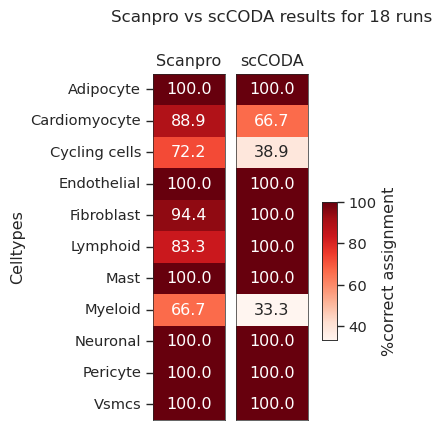

In [62]:
# Initialize plotting grid
fig, axarr = plt.subplots(1,2, figsize=(2., 4.5), gridspec_kw={'width_ratios': [2,2]})
axarr = axarr.flatten()
plt.subplots_adjust(wspace=0.15, hspace=0.03)

data_scanpro = results.groupby('clusters')['correct'].mean() * 100
data_scanpro = data_scanpro.to_frame()

data_sccoda = results_sccoda_all.groupby('clusters')['correct'].mean() * 100
data_sccoda = data_sccoda.to_frame()

############### Colorbars ################
ax = axarr[1]
percent_cax = inset_axes(ax,
                         width="20%", height="40%",
                         loc='lower left',
                         bbox_to_anchor=(1.2, 0.23, 1, 1),
                         bbox_transform=ax.transAxes, borderpad=0)
percent_cax.set_frame_on(True)
 
min_value = pd.concat([data_sccoda, data_scanpro], join='outer', axis=1).values.min()

########## Scanpro ##########

# First row
ax = axarr[0]
sns.heatmap(data_scanpro, 
            annot=True, fmt='.1f',
            ax=ax, cmap='Reds', cbar_ax=percent_cax, xticklabels=False, vmin=min_value,
            cbar_kws={"label": "%correct assignment"})

########## Sccoda ##########

# First row
ax = axarr[1]

sns.heatmap(data_sccoda, 
            annot=True, fmt='.1f',
            cmap='Reds',
            ax=ax, yticklabels=False, xticklabels=False, vmin=min_value,
            cbar_ax=percent_cax,
            cbar_kws={"label": "%correct assignment"})

############ Final adjustments ##############

#Titles
axarr[0].set_title("Scanpro")
axarr[1].set_title("scCODA")

### Set format of labels
for ax in axarr:
    ax.set_yticks(ax.get_yticks(), ax.get_yticklabels(), rotation=0, ha='right', rotation_mode='anchor')
    ax.set_ylabel("")
    ax.set_xlabel("")

    # Drawing the frame
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.5)

_ = axarr[0].set_ylabel("Celltypes")

#Border around cbars
for cax in [percent_cax]:
    for _, spine in cax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.5)

# Background for NAs
for ax in axarr:
    ax.patch.set_facecolor('lightgrey')
    ax.patch.set_edgecolor('grey')
    ax.patch.set_hatch('//')

# Set title of plot
title = f"Scanpro vs scCODA results for 18 runs"
axarr[1].text(0.5, 1.15, title, transform=axarr[1].transAxes, fontsize=12, ha="center")

# Save final figure
plt.savefig(f"{FIG_PATH}/humanMI_scanpro_vs_sccoda_combs.pdf", bbox_inches="tight", dpi=300)